Min Temperature: 21.39999961853028
Max Temperature: 29.799999237060547


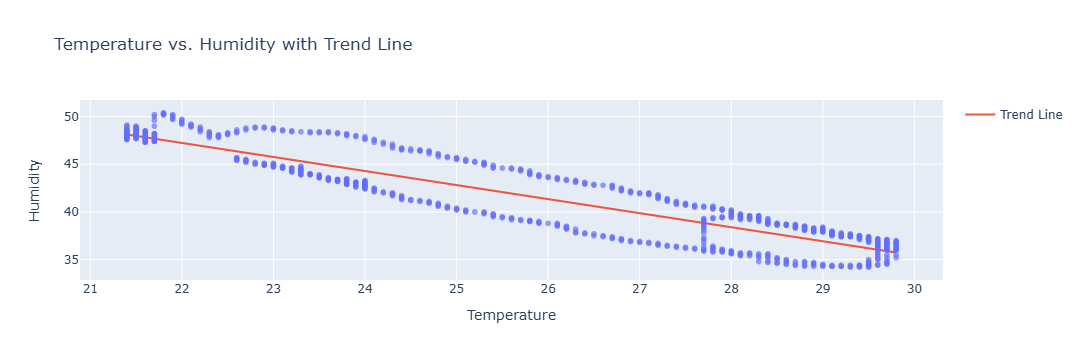

Min Temperature: 21.39999961853028
Max Temperature: 29.700000762939453


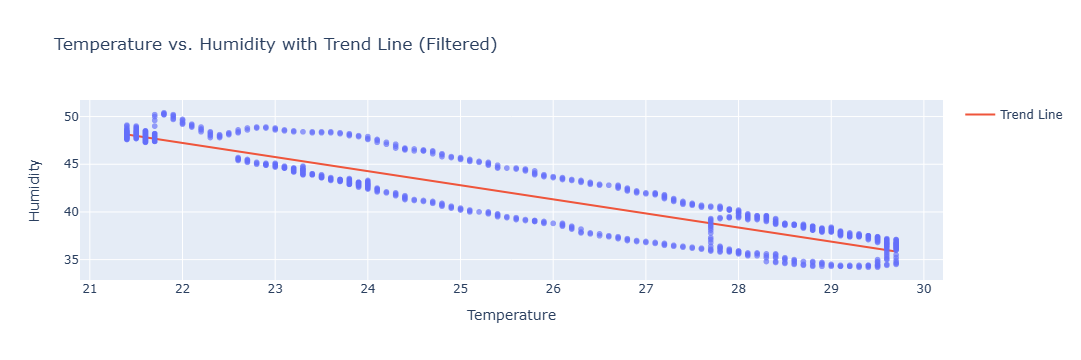

Min Temperature: 21.5
Max Temperature: 29.39999961853028


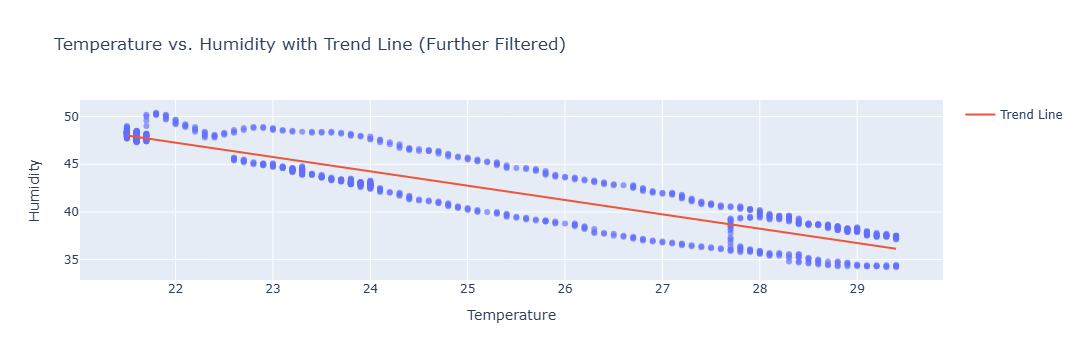

In [34]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('6.1_cleaned.csv')
df = df.rename(columns={'Temperature (°C)': 'Temperature', 'Humidity (%)': 'Humidity'})

# Function to plot and analyze
def plot_and_analyze(df, title):
    # Prepare data
    X = df['Temperature'].values.reshape(-1, 1)
    y = df['Humidity']
    
    # Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Create test temperature values
    temp_min, temp_max = X.min(), X.max()
    X_test = np.linspace(temp_min, temp_max, 100).reshape(-1, 1)
    y_test = model.predict(X_test)

    # Print min and max temperature
    print(f"Min Temperature: {temp_min}")
    print(f"Max Temperature: {temp_max}")
    
    # Plot
    fig = px.scatter(df, x='Temperature', y='Humidity', opacity=0.65, title=title)
    fig.add_traces(go.Scatter(x=X_test.flatten(), y=y_test, mode='lines', name='Trend Line'))
    fig.show()

# Initial plot
plot_and_analyze(df, 'Temperature vs. Humidity with Trend Line')

# Filter out outliers
temp_min, temp_max = df['Temperature'].quantile(0.05), df['Temperature'].quantile(0.95)
filtered_df = df[(df['Temperature'] >= temp_min) & (df['Temperature'] <= temp_max)]

# Plot after filtering outliers
plot_and_analyze(filtered_df, 'Temperature vs. Humidity with Trend Line (Filtered)')

# Further filtering outliers
# For demonstration, we filter a few more based on visual inspection or domain knowledge.
further_filtered_df = filtered_df[(filtered_df['Temperature'] >= filtered_df['Temperature'].quantile(0.1)) & 
                                  (filtered_df['Temperature'] <= filtered_df['Temperature'].quantile(0.9))]

# Plot after further filtering outliers
plot_and_analyze(further_filtered_df, 'Temperature vs. Humidity with Trend Line (Further Filtered)')

